# Using Machine Learning to Extract Trend Features
## Category is restricted to "Fashion"

In [1]:
# importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# importing the tweets dataset
df = pd.read_csv("tweet_data.csv")
tweets = df.text
df

,Unnamed: 0,tweet_id,text,favorite_count,retweet_count,created_at
0,0,1302597759438995456,"@Trav_Roebuck It shouldn't be hard, General Jo...",0,0,Sun Sep 06 13:21:21 +0000 2020
1,1,1302597758432337920,RT @Alzhacker: https://t.co/e1z7SPtMDa\nCDC：CO...,0,13,Sun Sep 06 13:21:21 +0000 2020
2,2,1302597758382231553,RT @KarluskaP: World Bank Records COVID-19 Tes...,0,621,Sun Sep 06 13:21:21 +0000 2020
3,3,1302597757694357505,"RT @FacesOfCOVID: KEITH BROWN, 48, of Charlest...",0,118,Sun Sep 06 13:21:21 +0000 2020
4,4,1302597757413330946,"RT @doctormacias: Ahora que hay Covid-19, será...",0,431,Sun Sep 06 13:21:21 +0000 2020
...,...,...,...,...,...,...
1995,1995,1302596718475776000,RT @Oregonian: A video claimed to show an ‘ant...,0,194,Sun Sep 06 13:17:13 +0000 2020
1996,1996,1302596717204840448,RT @jakpost: Jakarta cemetery space about to r...,0,58,Sun Sep 06 13:17:13 +0000 2020
1997,1997,1302596717163040769,RT @dondekojo: The President had a wedding par...,0,814,Sun Sep 06 13:17:13 +0000 2020
1998,1998,1302596716500332545,@_realanna @AnnieTangent @NYCSchools Check out...,0,0,Sun Sep 06 13:17:12 +0000 2020


#### Extracting the words from user tweets

In [3]:
words_dict = dict()

def upload_words(row):
    for word in row.split():
        try:
            formatted_word = word.lower()
        except:
            formatted_word = word
        if formatted_word in words_dict:
            words_dict[formatted_word] += 1
        else:
            words_dict[formatted_word] = 1

for row in tweets:
    upload_words(row)

#### Filtering out the irrelevant & uninterested words

In [4]:
import nltk
from nltk.corpus import stopwords
irrelevant_words = stopwords.words('english')

words,text = [],{}
for k,v in words_dict.items():
    if k not in irrelevant_words:
        words.append((v,k))
        text[k] = v
# Sorting the words by their frequency
words.sort(reverse = True)
words

[(1543, 'rt'),
 (838, 'covid-19'),
 (602, 'de'),
 (301, 'la'),
 (260, 'en'),
 (231, 'el'),
 (212, 'que'),
 (137, 'del'),
 (128, 'por'),
 (119, 'covid'),
 (108, 'covid-19,'),
 (104, '-'),
 (96, 'para'),
 (89, 'los'),
 (82, 'hospital'),
 (81, 'con'),
 (78, 'covid-19.'),
 (75, 'se'),
 (68, 'patient'),
 (68, 'driver'),
 (68, 'ambulance'),
 (67, '19'),
 (66, 'taken'),
 (63, 'cases'),
 (61, 'un'),
 (61, 'al'),
 (60, 'raped'),
 (58, 'kerala.'),
 (58, '&amp;'),
 (57, 'noufal'),
 (57, 'named'),
 (57, 'monst…'),
 (57, 'female'),
 (57, '@askanshul:'),
 (56, 'las'),
 (54, 'died'),
 (54, 'casos'),
 (51, 'es'),
 (49, '#covid_19'),
 (48, 'new'),
 (47, 'luis'),
 (46, 'dr'),
 (45, 'médico'),
 (44, 'esta'),
 (43, 'díaz'),
 (43, 'dos'),
 (42, '|'),
 (42, 'test'),
 (42, 'e'),
 (42, '#covid19'),
 (41, 'pacientes'),
 (41, 'hay'),
 (40, 'ill'),
 (39, 'di'),
 (38, 'one'),
 (38, 'fernando'),
 (37, 'nuevos'),
 (37, '(…'),
 (37, '#6sep'),
 (36, 'rincón'),
 (36, 'profundamente'),
 (36, 'people'),
 (36, 'madrugada

<BarContainer object of 10 artists>

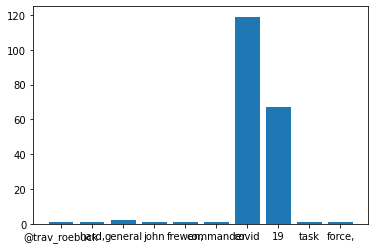

In [5]:
plt.bar(list(text.keys())[:10],list(text.values())[:10])

In [6]:
# importing fashion related keywords
keywords_df = pd.read_excel("fashion_words.xlsx")
keywords_df

,Keyword,term,Frequency
0,1,womens clothes,246000
1,2,80s fashion,201000
2,3,fashion designing,135000
3,4,fashion designer,110000
4,5,fashion blog,110000
...,...,...,...
95,96,current fashion trends,4400
96,97,latest dress design 2016,4400
97,98,fashion women,4400
98,99,top fashion designers,4400


In [7]:
keywords_df["term"].value_counts()

latest fashion for women    1
fashion school              1
online fashion              1
80s fashion                 1
fashion illustration        1
                           ..
fashion for men             1
new york fashion week       1
style fashion               1
italian fashion             1
indian fashion              1
Name: term, Length: 100, dtype: int64

In [8]:
# Extracting fashion related terms
keywords,text = set(),""
full_keywords = list()
for row in keywords_df.term:
    full_keywords.append(row)
    for word in row.split():
        if word not in irrelevant_words:
            keywords.add(word)
keywords

{'2016',
 '80s',
 'accessory',
 'asian',
 'blog',
 'boutique',
 'brands',
 'bug',
 'celebrity',
 'clothes',
 'current',
 'design',
 'designer',
 'designers',
 'designing',
 'dress',
 'dresses',
 'fall',
 'famous',
 'fashion',
 'french',
 'games',
 'girls',
 'high',
 'house',
 'illustration',
 'indian',
 'industry',
 'infashion',
 'italian',
 'japanese',
 'korean',
 'ladies',
 'latest',
 'london',
 'look',
 'magazine',
 'men',
 'mens',
 'merchandising',
 'mode',
 'model',
 'new',
 'news',
 'online',
 'outfits',
 'outlet',
 'paris',
 'photography',
 'pictures',
 'runway',
 'school',
 'shop',
 'shopping',
 'show',
 'spring',
 'store',
 'street',
 'style',
 'stylist',
 'summer',
 'teen',
 'tips',
 'top',
 'tops',
 'trends',
 'trendy',
 'tv',
 'urban',
 'vintage',
 'vogue',
 'websites',
 'week',
 'wholesale',
 'winter',
 'women',
 'womens',
 'york',
 'young'}

In [9]:
# Filtering the extracted words
filtered_words,text = [],[]
for frequency,term in words:
    if term in keywords:
        filtered_words.append((frequency, term))
        text.extend([term for i in range(frequency)])
filtered_words.sort(reverse=True)
filtered_words

[(48, 'new'),
 (26, 'week'),
 (12, 'school'),
 (9, 'show'),
 (8, 'news'),
 (7, 'look'),
 (6, 'house'),
 (4, 'high'),
 (3, 'women'),
 (3, 'tv'),
 (3, 'top'),
 (3, 'online'),
 (3, 'model'),
 (3, 'fall'),
 (2, 'young'),
 (2, 'tips'),
 (2, 'summer'),
 (2, 'store'),
 (2, 'indian'),
 (2, 'french'),
 (1, 'york'),
 (1, 'teen'),
 (1, 'street'),
 (1, 'shop'),
 (1, 'latest'),
 (1, 'industry'),
 (1, 'girls'),
 (1, 'current')]

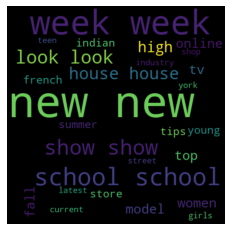

In [10]:
# Wordcloud of the mapped words
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=500).generate(" ".join(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### Generating the Fashion terms that are most tweeted by the users

In [11]:
def isThereTerm(word):
    for item in full_keywords:
        if word in item:
            return item
    return ''
    
keyword_terms = set()
for i, term in filtered_words:
    result = isThereTerm(term)
    if result:
        keyword_terms.add(result)
keyword_terms

{'current fashion trends',
 'fall fashion',
 'fashion house',
 'fashion industry',
 'fashion look',
 'fashion model',
 'fashion news',
 'fashion school',
 'fashion shop',
 'fashion show',
 'fashion store',
 'fashion tips',
 'fashion tv',
 'fashion week',
 'french fashion',
 'girls fashion',
 'high fashion',
 'indian fashion',
 'latest fashion',
 'new york fashion week',
 'online fashion',
 'street fashion',
 'summer fashion',
 'teen fashion',
 'top fashion',
 'womens clothes',
 'young fashion'}

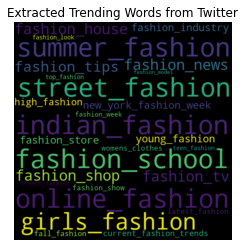

In [12]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=500).generate(" ".join([i.replace(' ','_') for i in keyword_terms]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Extracted Trending Words from Twitter")
plt.show()